Vibration Data Processing
Time Domain, Frequency Domain, Velocity signal, Data Processing, windows, filter, auto correration(AR), power spectra density (PSD)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df=pd.read_csv('/content/chatterteset1.csv')


In [ ]:
time = df['time']
velocity = df['velocity']

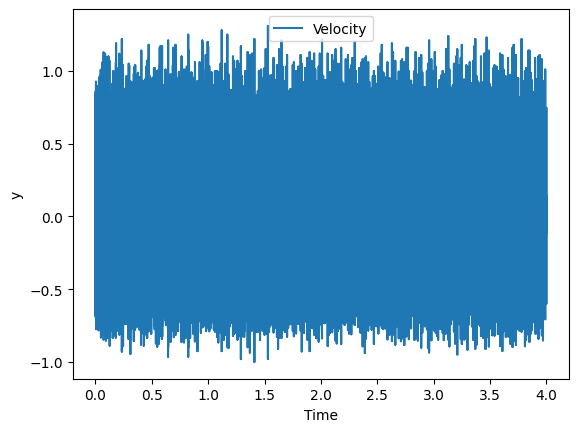

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Plot the solution
plt.plot(time, velocity, label='Velocity')
plt.xlabel('Time')
plt.ylabel('y')
plt.legend()
plt.show()

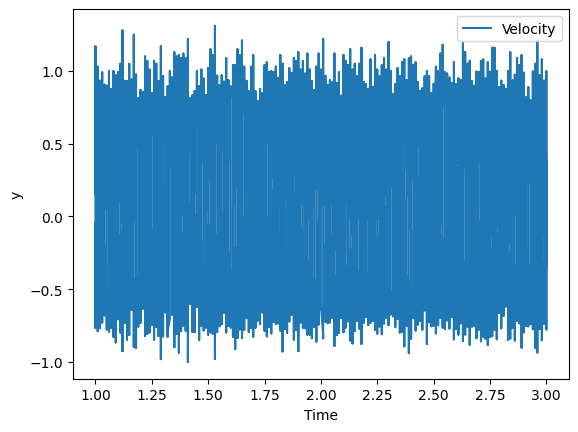

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Assuming your data is stored in a NumPy array named 'data'
# 'data[:, 0]' represents the time column and 'data[:, 1]' represents the velocity column

# Sort data based on time

# Calculate the middle 50% indices
start_index = int(len(time) * 0.25)  # Starting index of the middle 50%
end_index = int(len(time) * 0.75)  # Ending index of the middle 50%

# Extract the middle 50% of data
corrected_time = time[start_index:end_index]
corrected_velocity = velocity[start_index:end_index]

# Now 'middle_50_percent_data' contains the extracted 50% of data based on time

# Plot the solution
plt.plot(corrected_time, corrected_velocity, label='Velocity')
plt.xlabel('Time')
plt.ylabel('y')
plt.legend()
plt.show()


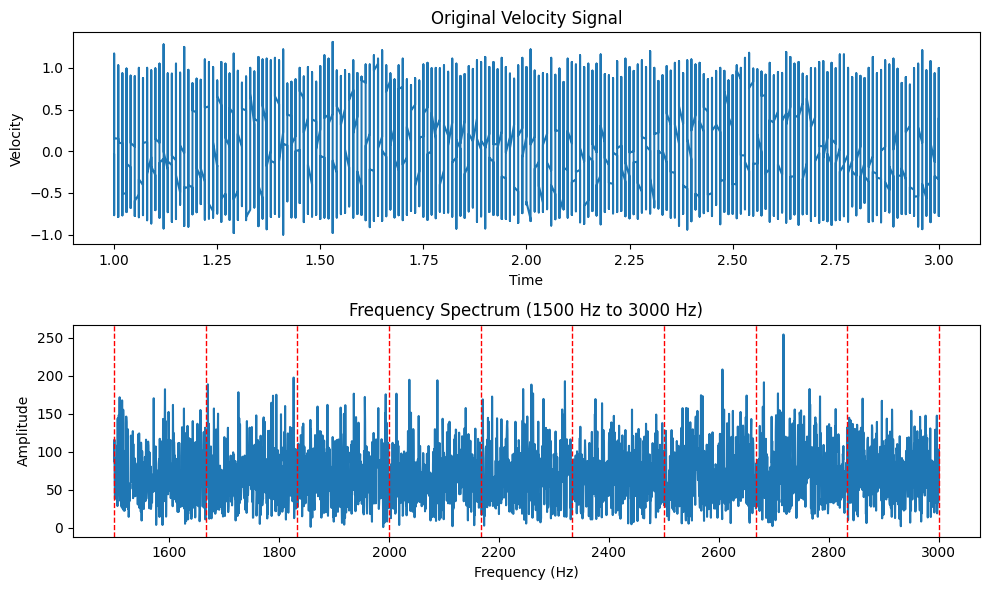

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sample velocity signal (replace this with your actual velocity signal)
# For demonstration purposes, let's generate a synthetic signal
t = corrected_time  # Time array
velocity_signal = corrected_velocity

# Perform FFT
#sampling_rate = 1 / (t[1] - t[0])  # Mathmatical Sampling rate
sampling_rate = 51200 # Sampling_rate from the experiment set-up
n = len(velocity_signal)  # Length of the signal
total_data_points = n

# Calculate the number of data points to select (70% of the total)
percentage_to_select = 0.7
num_to_select = int(percentage_to_select * total_data_points)

# Calculate the starting and ending indices for the middle 70%
start_index = int((total_data_points - num_to_select) / 2)
end_index = start_index + num_to_select

# Generate example data (replace this with your actual data)
data = np.random.rand(total_data_points)  # Generating random data for demonstration

# Select the middle 70% of the data
selected_velocity = data[start_index:end_index]


frequencies = np.fft.fftfreq(total_data_points, d=1 / sampling_rate)  # Frequency components
fft_result = np.fft.fft(selected_velocity)  # FFT of the signal

# Define the frequency range of interest
freq_range_start = 1500
freq_range_end = 3000

# Find the indices corresponding to the desired frequency range
indices = np.where((frequencies >= freq_range_start) & (frequencies <= freq_range_end))[0]

# Extract the frequencies and FFT results within the specified range
freq_range = frequencies[indices]
fft_range = fft_result[indices]

# Plotting
plt.figure(figsize=(10, 6))

# Plot the original signal
plt.subplot(2, 1, 1)
plt.plot(t, velocity_signal)
plt.title('Original Velocity Signal')
plt.xlabel('Time')
plt.ylabel('Velocity')

# Plot the frequency spectrum within the specified range
plt.subplot(2, 1, 2)
plt.plot(freq_range, np.abs(fft_range))
plt.title('Frequency Spectrum ({} Hz to {} Hz)'.format(freq_range_start, freq_range_end))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

# Calculate harmonics of spindle speed (2000 RPM)
spindle_speed_hz = 10000 / 60  # Convert RPM to Hz
harmonics = np.arange(9, 19) * spindle_speed_hz  # Consider harmonics up to 10th

# Plot vertical lines for harmonics on the frequency spectrum
for harmonic in harmonics:
    plt.axvline(x=harmonic, color='r', linestyle='--', linewidth=1)

plt.tight_layout()
plt.show()


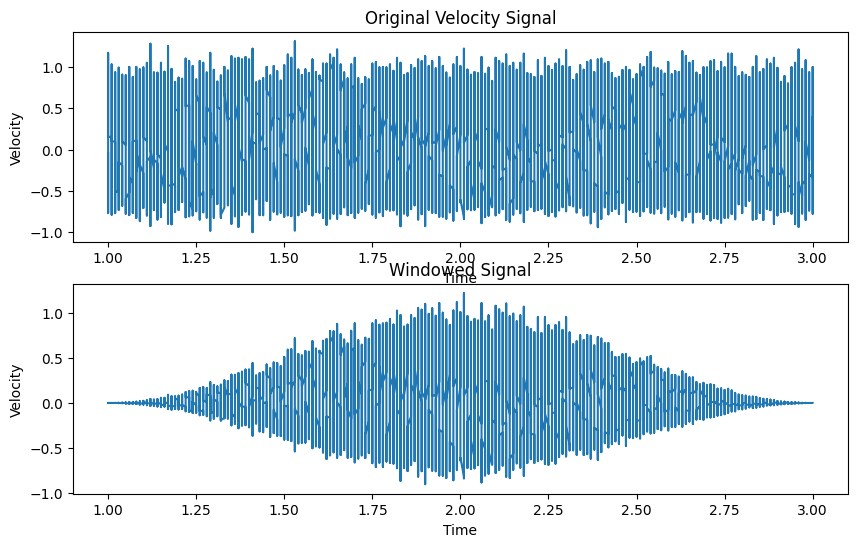

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Apply a Hann window to the signal
windowed_signal = velocity_signal * np.hanning(len(velocity_signal))

# Plotting
plt.figure(figsize=(10, 6))

# Plot the original signal
plt.subplot(2, 1, 1)
plt.plot(t, velocity_signal)
plt.title('Original Velocity Signal')
plt.xlabel('Time')
plt.ylabel('Velocity')

# Plot the frequency spectrum within the specified range
plt.subplot(2, 1, 2)
plt.plot(t, windowed_signal)
plt.title('Windowed Signal')
plt.xlabel('Time')
plt.ylabel('Velocity')

plt.show()

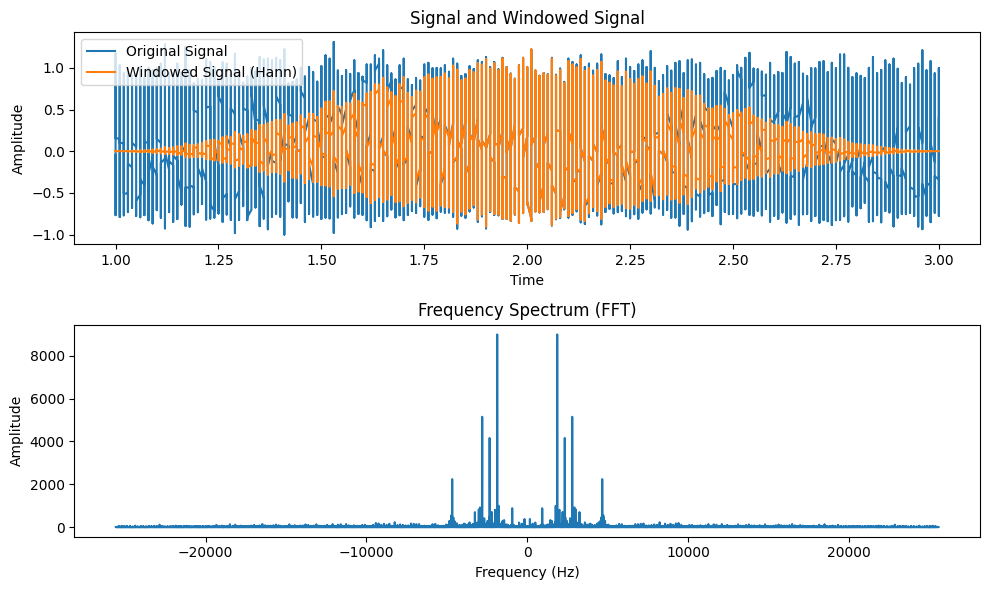

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Perform FFT on the windowed signal
fft_result = np.fft.fft(windowed_signal)
frequencies = np.fft.fftfreq(len(fft_result), d=1 / sampling_rate)

# Plotting
plt.figure(figsize=(10, 6))

# Plot the original and windowed signals
plt.subplot(2, 1, 1)
plt.plot(t, velocity_signal, label='Original Signal')
plt.plot(t, windowed_signal, label='Windowed Signal (Hann)')
plt.title('Signal and Windowed Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

# Plot the frequency spectrum
plt.subplot(2, 1, 2)
plt.plot(frequencies, np.abs(fft_result))
plt.title('Frequency Spectrum (FFT)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


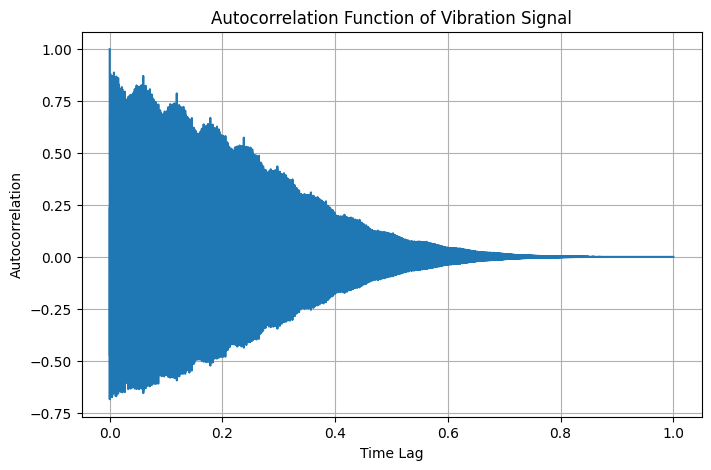

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have vibration signal data stored in 'vibration_signal'
# Replace this with your actual vibration signal data
vibration_signal = windowed_signal

# Calculate autocorrelation using NumPy
autocorr = np.correlate(vibration_signal, vibration_signal, mode='full')  # Full autocorrelation

# Normalization of the autocorrelation function
autocorr /= np.max(autocorr)  # Normalize to have a maximum value of 1

# Create a time lag array corresponding to the autocorrelation
time_lags = np.arange(-len(vibration_signal) + 1, len(vibration_signal)) / len(vibration_signal)

# Plot the autocorrelation function
plt.figure(figsize=(8, 5))
plt.plot(time_lags[len(vibration_signal)-1:], autocorr[len(vibration_signal)-1:])
plt.title('Autocorrelation Function of Vibration Signal')
plt.xlabel('Time Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()


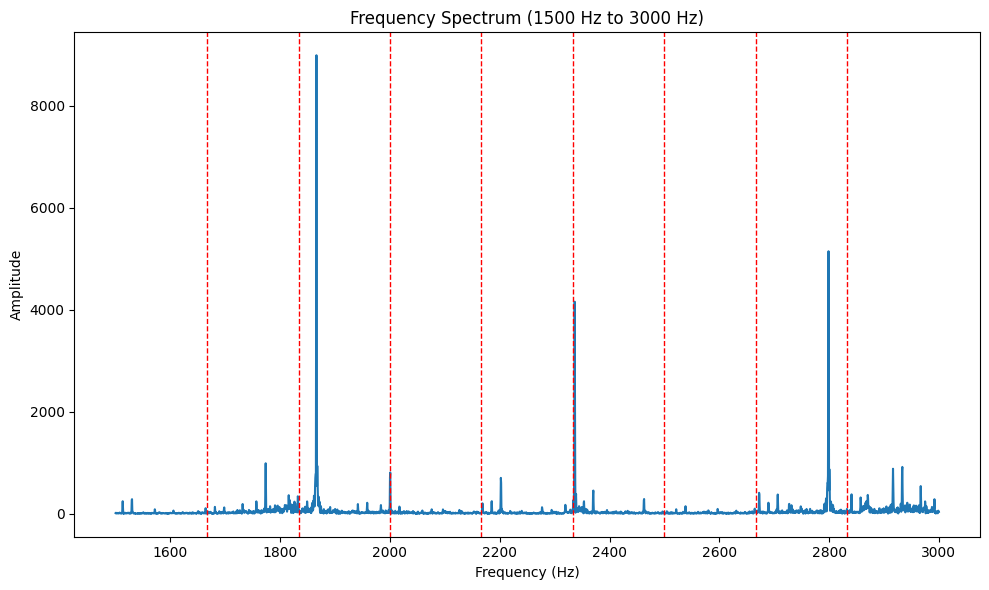

In [ ]:
import numpy as np
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt


# Define the frequency range of interest (1800 Hz to 2400 Hz)
freq_range_start = 1800
freq_range_end = 2400

# Find the indices corresponding to the desired frequency range
indices = np.where((frequencies >= freq_range_start) & (frequencies <= freq_range_end))[0]

# Create a bandpass filter
nyquist_freq = 0.5 * sampling_rate
low = freq_range_start / nyquist_freq
high = freq_range_end / nyquist_freq
order = 4  # Example filter order (adjust as needed)
b, a = butter(order, [low, high], btype='band')

# Apply the bandpass filter
filtered_data = filtfilt(b, a, windowed_signal)

# Define the frequency range of interest
freq_range_start = 1500
freq_range_end = 3000


# Find the indices corresponding to the desired frequency range
indices = np.where((frequencies >= freq_range_start) & (frequencies <= freq_range_end))[0]

# Extract the frequencies and FFT results within the specified range
freq_range = frequencies[indices]
fft_range = fft_result[indices]

# Plotting
plt.figure(figsize=(10, 6))

# Plot the frequency spectrum within the specified range
plt.plot(freq_range, np.abs(fft_range))
plt.title('Frequency Spectrum ({} Hz to {} Hz)'.format(freq_range_start, freq_range_end))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

# Calculate harmonics of spindle speed (2000 RPM)
spindle_speed_hz = 10000 / 60  # Convert RPM to Hz
harmonics = np.arange(10, 18) * spindle_speed_hz  # Consider harmonics up to 10th

# Plot vertical lines for harmonics on the frequency spectrum
for harmonic in harmonics:
    plt.axvline(x=harmonic, color='r', linestyle='--', linewidth=1)

plt.tight_layout()
#plt.show()


plt.show()


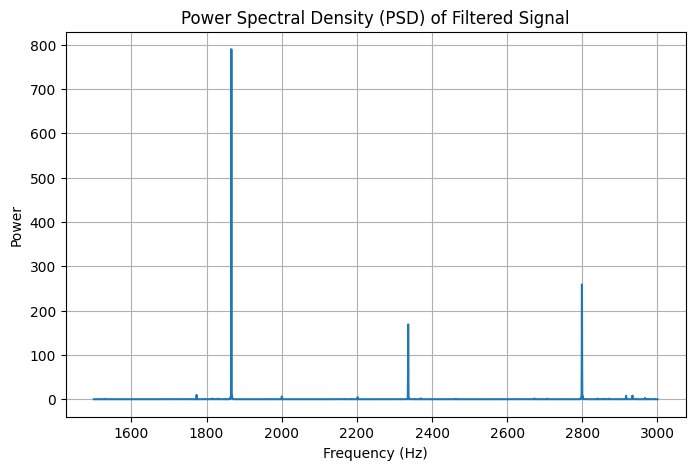

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Calculate the Power Spectral Density (PSD) of the filtered signal using FFT
psd_filtered = np.abs(np.fft.fft(windowed_signal))**2 / len(windowed_signal)  # Normalize by the signal length

# Frequency axis corresponding to the PSD of the filtered signal
frequencies_filtered = np.fft.fftfreq(len(psd_filtered), d=1/sampling_rate)

num_samples = len(windowed_signal)
# Plot the PSD
#plt.figure(figsize=(8, 5))
#plt.plot(frequencies_filtered[:num_samples//2], psd_filtered[:num_samples//2])  # Plot only positive frequencies
mask = (frequencies_filtered >= 1500) & (frequencies_filtered <= 3000)
plt.figure(figsize=(8, 5))
plt.plot(frequencies_filtered[mask], psd_filtered[mask])  # Plot PSD within specified frequency range
plt.title('Power Spectral Density (PSD) of Filtered Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.grid(True)
plt.show()